# openCV

In [1]:
import cv2

img = cv2.imread('lena.jpg', 1) #read image 1)color, 0)grayscale, -1)Load image including alpha channel(degree of transparancy)
print(img) # print images in the form of array
cv2.imshow('image', img) # display image
k = cv2.waitKey(0)  # showing img for 5 sec

if k == 27:  # if someone press esc key
    cv2.destroyAllWindows()
elif k == ord('s'): # if someone press s key
    cv2.imwrite('lena_image.png', img)


[[[128 138 225]
  [127 137 224]
  [126 136 224]
  ...
  [126 145 236]
  [110 129 220]
  [ 86 104 197]]

 [[127 137 224]
  [127 137 224]
  [127 137 224]
  ...
  [130 150 235]
  [112 132 217]
  [ 83 102 189]]

 [[127 137 224]
  [127 137 224]
  [128 138 225]
  ...
  [127 148 230]
  [112 133 215]
  [ 85 105 190]]

 ...

 [[ 55  21  82]
  [ 54  20  81]
  [ 62  28  92]
  ...
  [ 82  71 175]
  [ 78  68 175]
  [ 74  65 175]]

 [[ 55  18  80]
  [ 56  19  81]
  [ 66  32  96]
  ...
  [ 82  69 177]
  [ 80  71 181]
  [ 81  72 183]]

 [[ 56  19  81]
  [ 58  21  83]
  [ 68  34  98]
  ...
  [ 81  68 176]
  [ 81  72 183]
  [ 84  74 188]]]


## Live video sharing

In [2]:
import cv2

cap = cv2.VideoCapture(0);# 0 means the main camera if have multiple camera the can give 1,2,3..
print(cap.isOpened()) # return true if video is opened else False
while (cap.isOpened()):
    ret, frame = cap.read() # ret boolean field return True if frame present else Fasle

    print(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    print(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    cv2.imshow('frame', gray)

    if cv2.waitKey(1) == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


True


## Saving video using fourcc
#### FourCC is a 4-byte code used to specify the video codec

In [2]:
cap = cv2.VideoCapture(0)

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi', fourcc, 20.0, (640, 480))
#out = cv2.VideoWriter('vide_name.avi', fourcc, fps, (size))

print(cap.isOpened())
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        out.write(frame)

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        cv2.imshow('frame', gray)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
cap.release()
out.release()
cv2.destroyAllWindows()

True


## Draw geometric shapes on images using Python OpenCV
p1-Starting co-ordinates
<br>
p2-Ending co-ordinates

In [73]:
import numpy as np
import cv2

img = cv2.imread('lena.jpg',1)

#img = cv2.line(img, p1, p2, (BGR), thickness)
img = cv2.line(img, (0,0), (255,255), (0,0,255), 3)

img = cv2.arrowedLine(img, (0,255), (255,255), (255,0,0), 3)

img = cv2.rectangle(img, (384, 0), (510, 128), (0, 0, 255), 10)

# img = cv2.circle(img, center, radius, color, thickness)
img = cv2.circle(img, (447,63), 63, (0,255,0), -1) #-1 fill whole circle

#put text on image
#cv2.putText(img, text, co-ordinate, font-face)
font_face = cv2.FONT_HERSHEY_SIMPLEX
img = cv2.putText(img, 'OpenCv', (10, 500), font_face, 4, (0, 255, 255), 10, cv2.LINE_AA)

cv2.imshow('image',img)

cv2.waitKey(0)
cv2.destroyAllWindows()

## Changin resolution of camera
#### set some properties to captured images<br>
#### cap.set(self, propId, value)

In [3]:
import cv2
cap = cv2.VideoCapture(0)
print(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
print(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

cap.set(3, 1280)
cap.set(4, 720)


print(cap.get(3))
print(cap.get(4))

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        cv2.imshow('frame', gray)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
        
cap.release()
cv2.destroyAllWindows()

640.0
480.0
1280.0
720.0


## Texing & Date Time on video 

In [6]:
import datetime
import cv2

cap = cv2.VideoCapture(0)
cap.set(3, 1280)
cap.set(4, 720)
# print(cap.get(3))
# print(cap.get(4))
while cap.isOpened():
    ret, frame = cap.read()
    if ret == True:
        font = cv2.FONT_HERSHEY_SIMPLEX #font style(font-face)
        text = 'Width: '+ str(cap.get(3)) + 'Height:' + str(cap.get(4)) #converting value to string
        datet = str(datetime.datetime.now()) #converting value to string
        frame = cv2.putText(frame, datet, (10, 50), font, 1,(0, 255, 255), 2, cv2.LINE_AA)
        cv2.imshow('frame', frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()
cv2.destroyAllWindows()


## Handle Mouse Events
#### cv2.setMouseCallback()

In [68]:
import numpy as np
import cv2

# event = [i for i in dir(cv2) if 'EVENT' in i] # print all the EVENT
# print(event)

def click_event(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN: # left moust button event
        print(x,',',y)
        font = cv2.FONT_HERSHEY_COMPLEX
        strXY = str(x) + ', ' + str(y) # converting to string
        cv2.putText(img, strXY, (x,y), font, 1, (255, 255, 0), 2)
        cv2.imshow('image', img)

img = np.zeros((512, 512, 3), np.uint8) # black image using numpy 
cv2.imshow('image', img)

cv2.setMouseCallback('image', click_event)

cv2.waitKey(0)
cv2.destroyAllWindows()

81 , 135
232 , 242
356 , 26


#### Showing co-ordiantes and RGB color

In [71]:
import numpy as np
import cv2

# event = [i for i in dir(cv2) if 'EVENT' in i] # print all the EVENT
# print(event)

def click_event(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        print(x,',',y)
        font = cv2.FONT_HERSHEY_COMPLEX
        strXY = str(x) + ', ' + str(y)
        cv2.putText(img, strXY, (x,y), font, 1, (255, 255, 0), 2)
        cv2.imshow('image', img)
    
    if event == cv2.EVENT_RBUTTONDOWN:
        blue = img[y, x, 0]
        green = img[y, x, 1]
        red = img[y, x, 2]
        font = cv2.FONT_HERSHEY_COMPLEX
        strBGR = str(blue) + ', ' + str(green) + ', ' + str(red)
        cv2.putText(img, strBGR, (x,y), font, .5, (0, 255, 255), 2)
        cv2.imshow('image',img)
        
# img = np.zeros((512, 512, 3), np.uint8) # creating black image using numpy
img = cv2.imread('messi.jpg', 1)
cv2.imshow('image', img)

cv2.setMouseCallback('image', click_event)

cv2.waitKey(0)
cv2.destroyAllWindows()


142 , 145


#### Connecting click events using cv2.line

In [72]:
import numpy as np
import cv2

def click_event(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(img, (x,y), 3, (0,0,255), -1)
        points.append((x,y))
    
    if len(points) >= 2: # if points list have more than 2 values 
        cv2.line(img, points[-1], points[-2], (0,0,255), 1)
    cv2.imshow('image', img)
img = np.zeros((512, 512, 3), np.uint8)
cv2.imshow('image', img)
points = []
cv2.setMouseCallback('image', click_event)

cv2.waitKey(0)
cv2.destroyAllWindows()

#### Adding click event to show image colour in the clicked position

In [41]:
import numpy as np
import cv2

def click_event(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        blue = img[x, y, 0]
        green = img[x, y, 1]
        red = img[x, y, 2]
        mycolorImg = np.zeros((512, 512, 3), np.uint8)
        mycolorImg[:] = [blue, green, red]
        cv2.imshow('color', mycolorImg)
        
img = cv2.imread('lena.jpg', 1)
cv2.imshow('image', img)

cv2.setMouseCallback('image', click_event)

cv2.waitKey(0)
cv2.destroyAllWindows()

## Arithmetic operation using openCV

In [113]:
import numpy as np
import cv2
       
img = cv2.imread('messi.jpg', 1)

print(img.shape) # return the number of rows, columns, and channels
print(img.size) # return tottal number of pixels
print(img.dtype) # return datatype of img

b,g,r = cv2.split(img) # split bgr channels to b, g, r
img = cv2.merge((b,g,r)) 

ball = img[280:340, 330:390] # selecting a part in the image and add in another location
img[273:333, 100:160] = ball



cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

(679, 1020, 3)
2077740
uint8


### Add two images
##### In order to add two images need to have the images or the arrays of same size

In [122]:
import cv2

img = cv2.imread('messi.jpg')
img2 = cv2.imread('spider.png')


print(img.shape)
print(img2.shape)

img = cv2.resize(img, (512, 512))
img2 = cv2.resize(img2, (512, 512))

# img3 = cv2.add(img2, img) # adding image
img3 = cv2.addWeighted(img, 0.4, img2, 0.6, 0)
#img3 = cv2.addWeighted(img, weight1, img2, weight2, img, gamma value)


cv2.imshow('image', img3)
cv2.waitKey(0)
cv2.destroyAllWindows()

(679, 1020, 3)
(850, 940, 3)


### bit-wise operations on images

<img src='logic_table.gif' width=400 height=400>

## AND

In [6]:
import cv2

img1 = cv2.imread('1bit1.png')
img2 = cv2.imread('2bit2.png')

bitWisAnd = cv2.bitwise_and(img2, img1)

cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.imshow('bitWiseAnd',bitWisAnd)

if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()

## OR

In [7]:
import cv2

img1 = cv2.imread('1bit1.png')
img2 = cv2.imread('2bit2.png')

bitWisOr = cv2.bitwise_or(img2, img1)

cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.imshow('bitWiseOr', bitWisOr)

if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()

## NOT

In [14]:
import cv2

img1 = cv2.imread('1bit1.png')
img2 = cv2.imread('2bit2.png')

bitWiseNot = cv2.bitwise_not(img2, img1)

cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.imshow('bitWiseNOt', bitWiseNot)

if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()

## XOR

In [17]:
import cv2

img1 = cv2.imread('1bit1.png')
img2 = cv2.imread('2bit2.png')

bitWiseXOR = cv2.bitwise_xor(img2, img1)

cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.imshow('bitWiseNot', bitWiseXOR)

if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()

## Bind Trackbar To OpenCV Windows

In [14]:
import numpy as np
import cv2 

def nothing(x): # call back function if will be called when ever the value of trackbar changed
    # print(x)
    pass

img = np.zeros((300, 512, 3), np.uint8)
cv2.namedWindow('image') # named window

# Here create named window so that we can pass the name of window to createTrackbar 
cv2.createTrackbar('B', 'image', 0, 255, nothing)
cv2.createTrackbar('G', 'image', 0, 255, nothing)
cv2.createTrackbar('R', 'image', 0, 255, nothing)
# cv2.createTrackbar(trackbarName, windowName, value, count, onChange)



while(True):
    cv2.imshow('image', img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break

    r = cv2.getTrackbarPos('R', 'image')
    g = cv2.getTrackbarPos('G', 'image')
    b = cv2.getTrackbarPos('B', 'image')

    img[:] = [b, g, r]
     


cv2.destroyAllWindows()

<div>
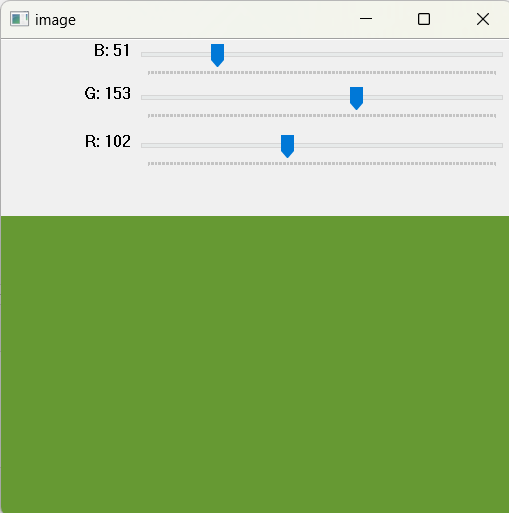
</div>

## Adding switch

In [3]:
import numpy as np
import cv2 

def nothing(x):
    pass

img = np.zeros((300, 512, 3), np.uint8)
cv2.namedWindow('image')


cv2.createTrackbar('B', 'image', 0, 255, nothing)
cv2.createTrackbar('G', 'image', 0, 255, nothing)
cv2.createTrackbar('R', 'image', 0, 255, nothing)

switch = '0 : OFF\n 1: ON'
cv2.createTrackbar(switch, 'image', 0, 1, nothing)


while(True):
    cv2.imshow('image', img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break

    r = cv2.getTrackbarPos('R', 'image')
    g = cv2.getTrackbarPos('G', 'image')
    b = cv2.getTrackbarPos('B', 'image')
    s = cv2.getTrackbarPos(switch, 'image')
    
    if s == 0:
        img[:] = 0
    else:
        img[:] = [b, g, r]
     
cv2.destroyAllWindows()

<div>
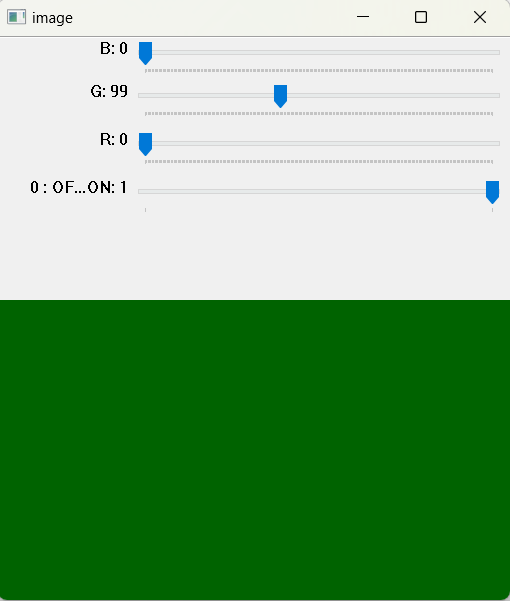
</div>

In [5]:
import numpy as np
import cv2 as cv

def nothing(x):
    pass
#     print(x)

# Create a black image, a window
cv.namedWindow('image')

cv.createTrackbar('CP', 'image', 10, 400, nothing)

switch = 'color/gray'
cv.createTrackbar(switch, 'image', 0, 1, nothing)

while(1):
    img = cv.imread('lena.jpg')
    pos = cv.getTrackbarPos('CP', 'image')
    font = cv.FONT_HERSHEY_SIMPLEX
    cv.putText(img, str(pos), (50, 150), font, 6, (0, 0, 255), 10)
    s = cv.getTrackbarPos(switch, 'image')

    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break
        
    if s == 0:
        pass
    else:
        img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    img = cv.imshow('image',img)

cv.destroyAllWindows()